/tmp/ipykernel_34767/3667615748.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)
/tmp/ipykernel_34767/3667615748.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)


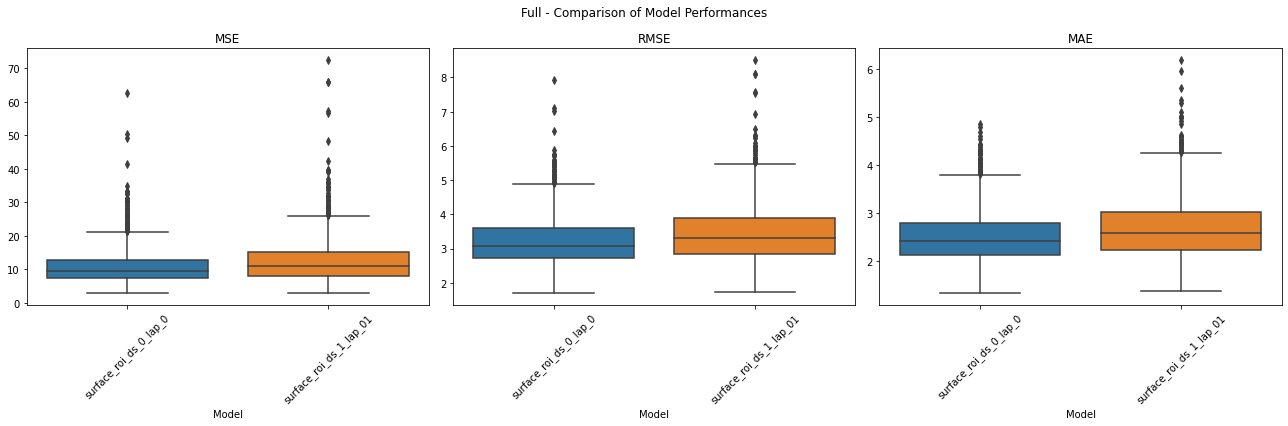

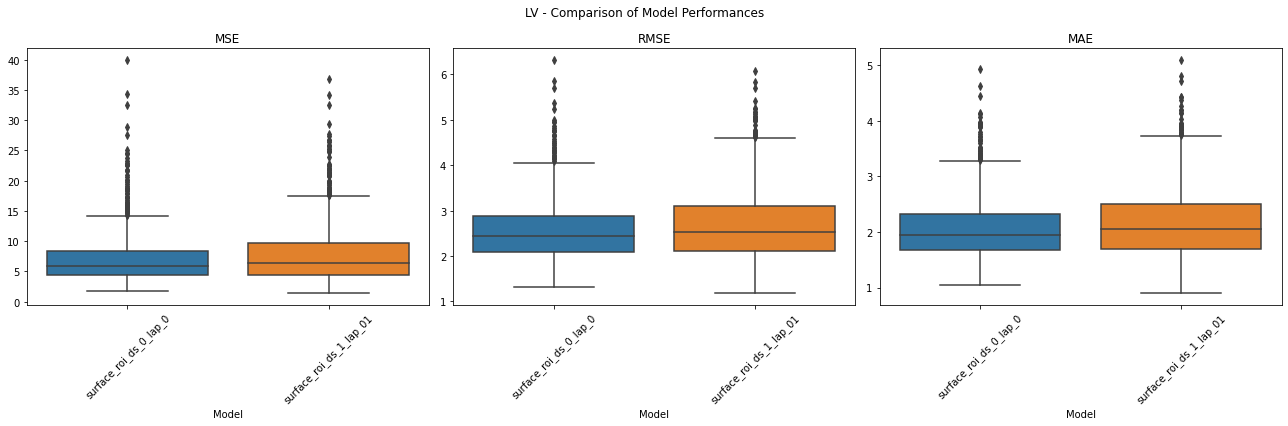

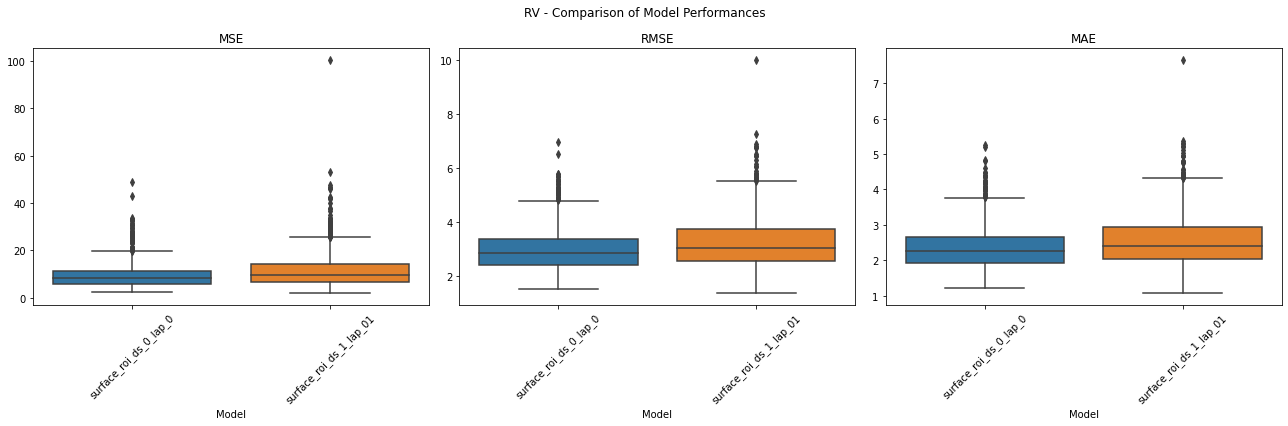

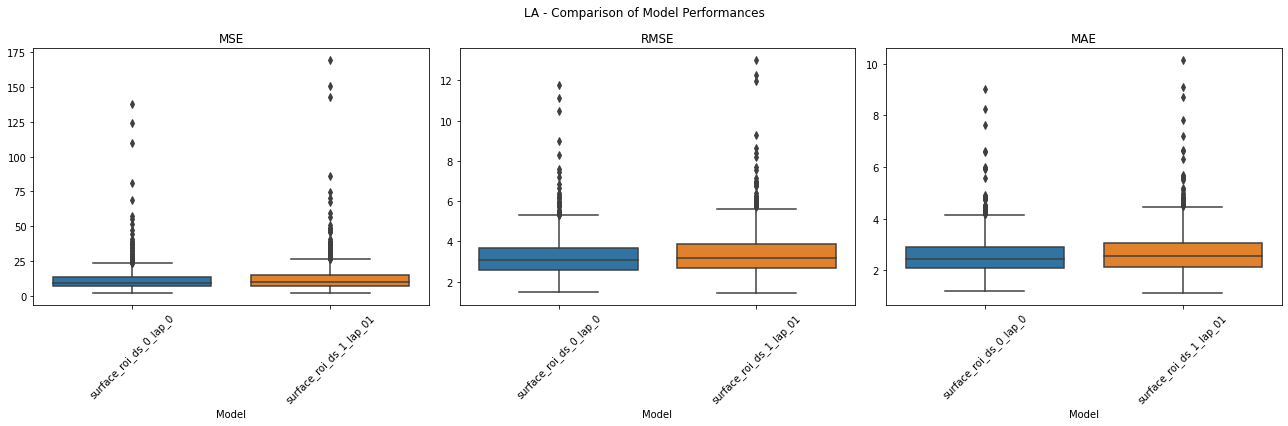

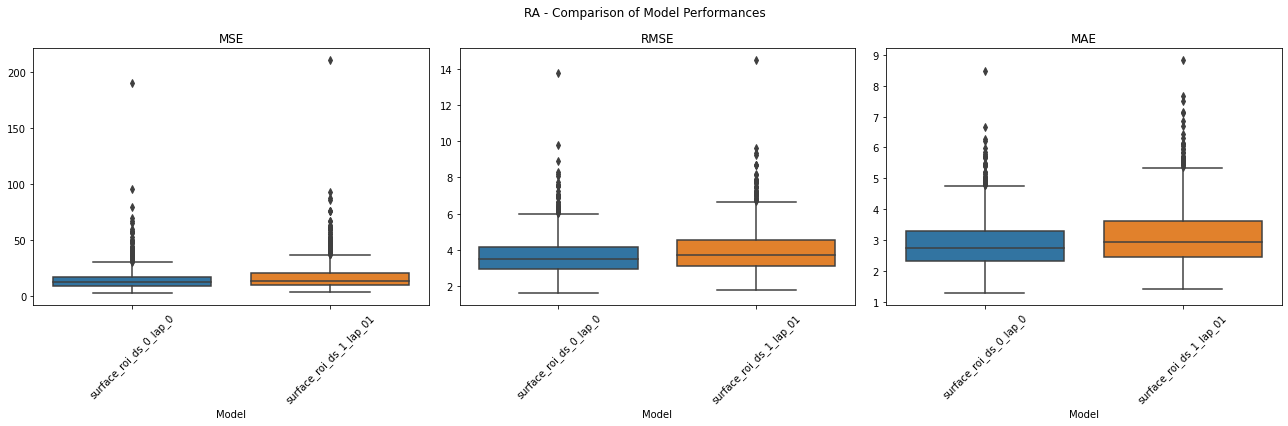

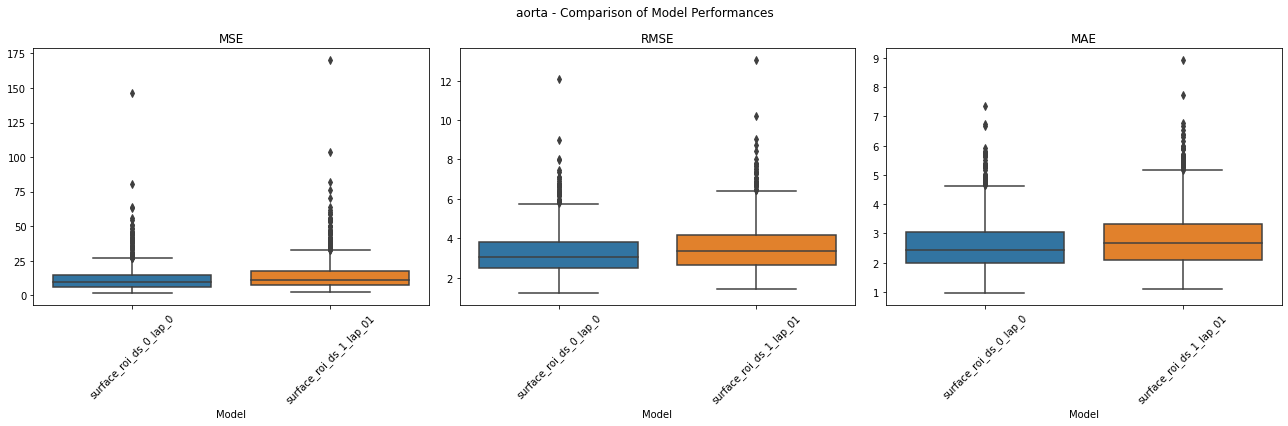

In [15]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to read and process the evaluation results from a CSV file
def process_results(csv_file, model_name):
    df = pd.read_csv(csv_file)
    df['Model'] = model_name
    return df[['Model', 'Subpart', 'MSE', 'RMSE', 'MAE']]

# Directory containing the evaluation results
results_dir = "../Predictions/Surface/"

# DataFrame to store the evaluation results for each subpart
all_results = pd.DataFrame()

# Iterate over the models in the directory
for model_name in os.listdir(results_dir):
    model_path = os.path.join(results_dir, model_name)
    eval_file = os.path.join(model_path, "eval.csv")

    # Process the evaluation results for the current model
    results = process_results(eval_file, model_name)
    all_results = all_results.append(results, ignore_index=True)

# Create boxplots for MSE, RMSE, and MAE for each subpart
subparts = ['Full', 'LV', 'RV', 'LA', 'RA', 'aorta']
metrics = ['MSE', 'RMSE', 'MAE']

for subpart in subparts:
    fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6))

    for i, metric in enumerate(metrics):
        subset = all_results[all_results['Subpart'] == subpart]
        sns.boxplot(x="Model", y=metric, data=subset, ax=axes[i])
        axes[i].set_title(metric)
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='x', rotation=45)

    plt.suptitle(f"{subpart} - Comparison of Model Performances")
    plt.tight_layout()
    plt.show()


In [16]:
def get_nice_dataframe_sub(df, metrics, subpart = "Full", vertical = False):
    models = df["Model"].unique()
    df = df.copy()
    df = df[df["Subpart"] == subpart]

    # creates a dataframe where each metric has a column for its mean and std.
    # the mean and std. are computed for each model
    # the dataframe is then saved as a csv file
    df_std = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_std[metric] = df.groupby(["Model"])[metric].std()

    df_mean = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_mean[metric] = df.groupby(["Model"])[metric].mean()

    df_mean = df_mean.round(2)
    df_std = df_std.round(2)

    #combine both dataframes, intercalating columns

    empty_df = pd.DataFrame(columns = metrics)
    for metric in metrics:
        i = 0
        for model in models:
            mean_str = str(df_mean.loc[model, metric]) 
            std_str = str(df_std.loc[model, metric]) 
            if len(mean_str) == 3 or (mean_str[2] == '.' and len(mean_str) == 4):
                mean_str += '0'
            if len(std_str) == 3 or (std_str[2] == '.' and len(std_str) == 4):
                std_str += '0'
              
            empty_df.loc[model, metric] = mean_str + " (" + std_str + ")"
            i+=1

    # transposes the dataframe
    if vertical:
        empty_df = empty_df.T
    
    return empty_df

metrics = ['MAE', 'MSE', 'RMSE']
subparts = ['Full', 'LV', 'RV', 'LA', 'RA', 'aorta']

for subpart in subparts:
    print(subpart)
    nice = get_nice_dataframe_sub(all_results, metrics, subpart, vertical=1)
    display(nice)


Full


,surface_roi_ds_0_lap_0,surface_roi_ds_1_lap_01
MAE,2.51 (0.55),2.68 (0.64)
MSE,10.97 (5.54),12.58 (6.93)
RMSE,3.23 (0.73),3.44 (0.85)


LV


,surface_roi_ds_0_lap_0,surface_roi_ds_1_lap_01
MAE,2.04 (0.54),2.15 (0.63)
MSE,6.95 (4.04),7.73 (4.73)
RMSE,2.55 (0.67),2.67 (0.77)


RV


,surface_roi_ds_0_lap_0,surface_roi_ds_1_lap_01
MAE,2.35 (0.60),2.55 (0.74)
MSE,9.40 (5.17),11.33 (7.33)
RMSE,2.97 (0.76),3.23 (0.94)


LA


,surface_roi_ds_0_lap_0,surface_roi_ds_1_lap_01
MAE,2.58 (0.76),2.69 (0.85)
MSE,11.51 (9.08),12.45 (10.73)
RMSE,3.25 (0.98),3.36 (1.08)


RA


,surface_roi_ds_0_lap_0,surface_roi_ds_1_lap_01
MAE,2.88 (0.83),3.11 (0.95)
MSE,14.61 (10.70),16.87 (12.43)
RMSE,3.66 (1.10),3.92 (1.22)


aorta


,surface_roi_ds_0_lap_0,surface_roi_ds_1_lap_01
MAE,2.59 (0.86),2.83 (1.00)
MSE,11.84 (9.35),14.05 (11.50)
RMSE,3.26 (1.10),3.53 (1.25)


/tmp/ipykernel_34767/3849485326.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)
/tmp/ipykernel_34767/3849485326.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)


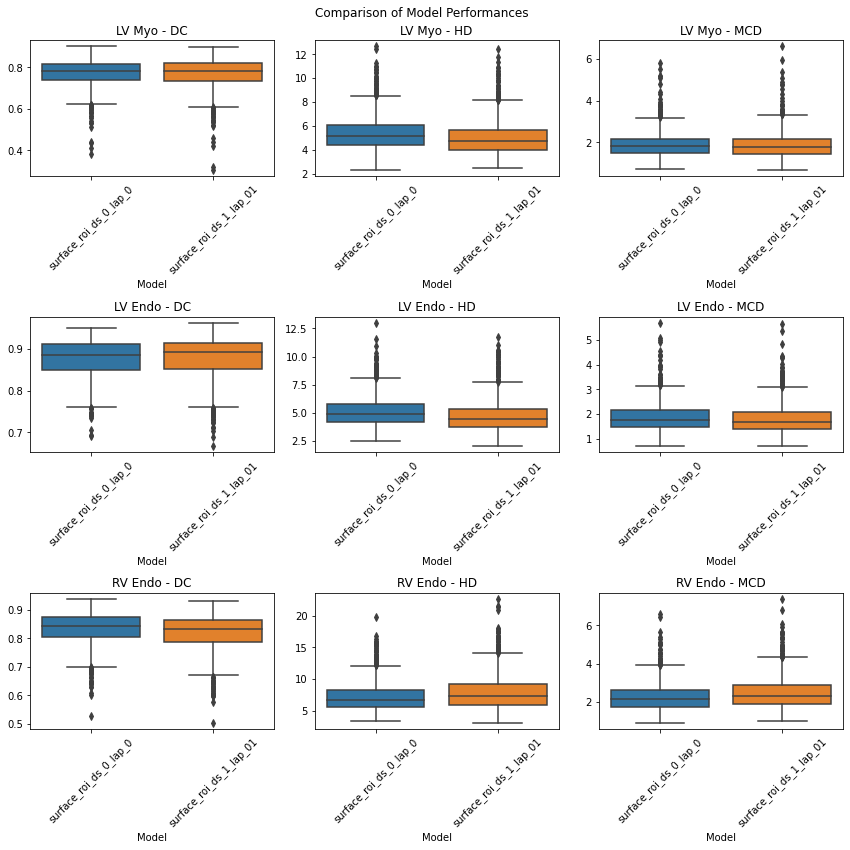

In [17]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to read and process the evaluation results from a CSV file
def process_results(csv_file, model_name):
    df = pd.read_csv(csv_file)
    df['Model'] = model_name
    return df

# Directory containing the evaluation results
results_dir = "../Predictions/Surface/"

# DataFrame to store the evaluation results for each subpart
all_results = pd.DataFrame()

# Iterate over the models in the directory
for model_name in os.listdir(results_dir):
    model_path = os.path.join(results_dir, model_name)
    eval_file = os.path.join(model_path, "metrics.csv")

    if not os.path.exists(eval_file):
        continue
    
    # Process the evaluation results for the current model
    results = process_results(eval_file, model_name)
    all_results = all_results.append(results, ignore_index=True)

metrics = ['LV Myo - DC', 'LV Myo - HD', 'LV Myo - MCD', 
           'LV Endo - DC', 'LV Endo - HD', 'LV Endo - MCD', 
           'RV Endo - DC', 'RV Endo - HD', 'RV Endo - MCD']

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, metric in enumerate(metrics):
    sns.boxplot(x="Model", y=metric, data=all_results, ax=axes[i // 3, i%3])
    axes[i // 3, i%3].set_title(metric)
    axes[i // 3, i%3].set_ylabel('')
    axes[i // 3, i%3].tick_params(axis='x', rotation=45)

plt.suptitle("Comparison of Model Performances")
plt.tight_layout()
plt.show()


In [18]:
def get_nice_dataframe(df, metrics, vertical = False):
    models = df["Model"].unique()

    # creates a dataframe where each metric has a column for its mean and std.
    # the mean and std. are computed for each model
    # the dataframe is then saved as a csv file
    df_std = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_std[metric] = df.groupby(["Model"])[metric].std()

    df_mean = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_mean[metric] = df.groupby(["Model"])[metric].mean()

    df_mean = df_mean.round(2)
    df_std = df_std.round(2)

    #combine both dataframes, intercalating columns

    empty_df = pd.DataFrame(columns = metrics)
    for metric in metrics:
        i = 0
        for model in models:
            mean_str = str(df_mean.loc[model, metric]) 
            std_str = str(df_std.loc[model, metric]) 
            if len(mean_str) == 3 or (mean_str[2] == '.' and len(mean_str) == 4):
                mean_str += '0'
            if len(std_str) == 3 or (std_str[2] == '.' and len(std_str) == 4):
                std_str += '0'
              
            empty_df.loc[model, metric] = mean_str + " (" + std_str + ")"
            i+=1

    # transposes the dataframe
    if vertical:
        empty_df = empty_df.T
    
    return empty_df


metrics = ['LV Endo - DC', 'LV Endo - HD', 'LV Endo - MCD', 
           'LV Myo - DC', 'LV Myo - HD', 'LV Myo - MCD', 
           'RV Endo - DC', 'RV Endo - HD', 'RV Endo - MCD']


#metrics = ["LA 2CH - DC", "LA 2CH - HD", "LA 2CH - MCD",
#            "LA 4CH - DC", "LA 4CH - HD", "LA 4CH - MCD",
#            "RA 4CH - DC", "RA 4CH - HD", "RA 4CH - MCD"]

nice = get_nice_dataframe(all_results, metrics, vertical=1)

nice["MCSI-Net-Paper"] = ["0.88 (0.05)", "7.06 (2.64)", "1.86 (0.79)",
                    "0.78 (0.08)", "4.75 (1.76)", "1.86 (0.82)", 
                    "0.85 (0.06)", "7.06 (2.64)", "2.27 (0.95)"]

display(nice)

,surface_roi_ds_0_lap_0,surface_roi_ds_1_lap_01,MCSI-Net-Paper
LV Endo - DC,0.88 (0.04),0.88 (0.05),0.88 (0.05)
LV Endo - HD,5.13 (1.34),4.70 (1.41),7.06 (2.64)
LV Endo - MCD,1.88 (0.57),1.80 (0.60),1.86 (0.79)
LV Myo - DC,0.77 (0.06),0.77 (0.07),0.78 (0.08)
LV Myo - HD,5.38 (1.42),4.96 (1.42),4.75 (1.76)
LV Myo - MCD,1.90 (0.59),1.87 (0.64),1.86 (0.82)
RV Endo - DC,0.83 (0.06),0.82 (0.06),0.85 (0.06)
RV Endo - HD,7.19 (2.30),7.86 (2.72),7.06 (2.64)
RV Endo - MCD,2.26 (0.71),2.47 (0.80),2.27 (0.95)
